## The purpose of the Capstone 2 project is to determine whether or not the lesion in an image is malignant

### Problem statement:###

Skin cancer is one of the most common kind of cancer in US. One in five Americans may develop skin cancer in their life, and currently over one million people are living with the disease. Despite such high number of patients, the mortality rate of skin cancer is very low as long as it is treated before the cancer spreads, with the five-year survival rate of 99%. However, five-year survival rates drop sharply after it evolves to regional and distant stage, to 64% and 23% respectively. Therefore skin cancer must be detected and treated early.
    <br><br/>Early stage of skin cancer can easily be confused with harmless mole and therefore can be overlooked. With the increased number of potential patients, there needs to be a more accessible way for people to diagnose themselves to find out whether they are at risk of developing malignant skin cancer.
    <br><br/>It is well known that malignant skin cancer shows specific characteristic that may imply its danger level called ABCDE rule. Asymmetry, Border, Color, Diameter, Evolution. By utilizing these attributes with image classification, I can build an algorithm for people to check if the mole growing on their arm is cancerous. While not a perfect way to diagnose the disease, it helps to let the potential patient know if they should pay a visit to the doctor.

In the project I try to identify the malignancy of the lesion in the image using this ABCDE rule. This part of the project focuses on the metadata to understand some of the tendency of the malignant versus benign lesion

Data source(ISIC) provides a link to download the images from the website directly.<br>
Therefore, I used the code built by "GalAvineri" on Github to download all the available images on the ISIC website and saved it on the current folder.

import necessary libraries

In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import json
import pickle

Get the path of the ISIC data and load metadata

In [2]:
image_path='./Data/Images/'
meta_path='./Data/Descriptions/'

imagelist=os.listdir(image_path)
metalist=os.listdir(meta_path)

pics=[file for file in imagelist]
meta=[file for file in metalist]

The size of the images were checked to see how much it varies

In [3]:
img_size_dict=dict()
from PIL import Image
for i in range(len(pics)):
    filename = pics[i]
    img = Image.open(image_path+filename)
    width, height = img.size
    img_size_dict[filename]=width * height

(array([1.2018e+04, 8.4580e+03, 1.0100e+02, 2.2230e+03, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 5.0000e+00, 1.0000e+00, 1.0960e+03]),
 array([  270000. ,  3287923.2,  6305846.4,  9323769.6, 12341692.8,
        15359616. , 18377539.2, 21395462.4, 24413385.6, 27431308.8,
        30449232. ]),
 <a list of 10 Patch objects>)

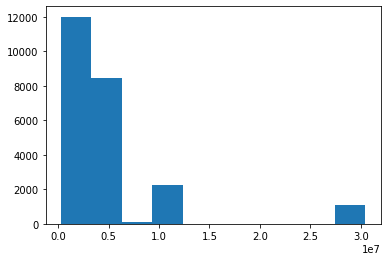

In [4]:
imgsize_var=list(img_size_dict.values())
plt.hist(imgsize_var)

In [5]:
print("The smallest image has "+str(min(imgsize_var))+" pixels")

The smallest image has 270000 pixels


In [6]:
print("The largest image has "+str(max(imgsize_var))+" pixels")

The largest image has 30449232 pixels


Most images tend to be small while a few images are very large.

Import meta data for the images to perform exploratory data analysis

In [7]:
from pandas.io.json import json_normalize

for file in meta:
    # Iterate over all the meta data text files
    filename=meta_path+'/'+file
    f=open(filename,"rt") # open each file
    data=json.load(f) # load content
    
    # create data frame to store the data in.
    if "df" not in locals(): # check if the df already exist.
        # create df and store the first data
        df=json_normalize(data)
    else:
        # append data from the rest of the file into same df
        df1=json_normalize(data)
        df=df.append(df1,ignore_index=True,sort=False)

In [8]:
df.head()

,_id,_modelType,created,creator._id,creator.name,dataset._accessLevel,dataset._id,dataset.description,dataset.license,dataset.name,...,meta.unstructured.mel_type,meta.unstructured.ulcer,meta.unstructured.vertical,meta.unstructured.id1,meta.unstructured.site,meta.clinical.mel_class,meta.clinical.mel_thick_mm,meta.unstructured.mel_assoc_nevus,meta.unstructured.Location,meta.unstructured.diagnosis_short
0,558d618dbae47801cf734963,image,2015-06-26T14:28:29.770000+00:00,54cb974fbae47819d8e4c727,User GQZH,0,5a2ecc5d1165975c94594284,Biopsy-confirmed melanocytic and non-melanocyt...,CC-0,MSK-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,550902ddbae478359aa587e2,image,2015-03-18T04:45:17.559000+00:00,54cb974fbae47819d8e4c727,User GQZH,0,5a2ecc5e1165975c945942a0,Moles in children.\nBenign melanocytic lesions...,CC-0,SONIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,558d60c7bae47801cf7344ef,image,2015-06-26T14:25:11.490000+00:00,54cb974fbae47819d8e4c727,User GQZH,0,5a2ecc5d1165975c94594284,Biopsy-confirmed melanocytic and non-melanocyt...,CC-0,MSK-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5509024abae478359aa581b6,image,2015-03-18T04:42:50.391000+00:00,54cb974fbae47819d8e4c727,User GQZH,0,5a2ecc5e1165975c945942a0,Moles in children.\nBenign melanocytic lesions...,CC-0,SONIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54e7dd1dbae4780ec59cdaa9,image,2015-02-21T01:19:25.499000+00:00,54cb974fbae47819d8e4c727,User GQZH,0,5a2ecc5e1165975c945942a0,Moles in children.\nBenign melanocytic lesions...,CC-0,SONIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.columns # check what data we have from the meta data

Index(['_id', '_modelType', 'created', 'creator._id', 'creator.name',
       'dataset._accessLevel', 'dataset._id', 'dataset.description',
       'dataset.license', 'dataset.name', 'dataset.updated',
       'meta.acquisition.image_type', 'meta.acquisition.pixelsX',
       'meta.acquisition.pixelsY', 'meta.clinical.age_approx',
       'meta.clinical.anatom_site_general', 'meta.clinical.benign_malignant',
       'meta.clinical.clin_size_long_diam_mm', 'meta.clinical.diagnosis',
       'meta.clinical.diagnosis_confirm_type', 'meta.clinical.family_hx_mm',
       'meta.clinical.melanocytic', 'meta.clinical.personal_hx_mm',
       'meta.clinical.sex', 'meta.unstructured.change',
       'meta.unstructured.changedtypeapr02_2015', 'meta.unstructured.location',
       'meta.unstructured.patientlocation', 'meta.unstructured.ptconcern',
       'meta.unstructured.quantloc', 'name', 'notes.reviewed.accepted',
       'notes.reviewed.time', 'notes.reviewed.userId', 'notes.tags', 'updated',
       'met

For later use, pickle the metatdata information into "isic_data"

In [10]:
# Save meta data in dataframe : isic_data
name="isic_data"
pickle.dump(df,open(name,"wb"))

If the meta data is needed, the script can start from here

In [11]:
# Load meta data in dataframe : isic_data
name="isic_data"
df=pickle.load(open(name,"rb"))

In [12]:
df.columns

Index(['_id', '_modelType', 'created', 'creator._id', 'creator.name',
       'dataset._accessLevel', 'dataset._id', 'dataset.description',
       'dataset.license', 'dataset.name', 'dataset.updated',
       'meta.acquisition.image_type', 'meta.acquisition.pixelsX',
       'meta.acquisition.pixelsY', 'meta.clinical.age_approx',
       'meta.clinical.anatom_site_general', 'meta.clinical.benign_malignant',
       'meta.clinical.clin_size_long_diam_mm', 'meta.clinical.diagnosis',
       'meta.clinical.diagnosis_confirm_type', 'meta.clinical.family_hx_mm',
       'meta.clinical.melanocytic', 'meta.clinical.personal_hx_mm',
       'meta.clinical.sex', 'meta.unstructured.change',
       'meta.unstructured.changedtypeapr02_2015', 'meta.unstructured.location',
       'meta.unstructured.patientlocation', 'meta.unstructured.ptconcern',
       'meta.unstructured.quantloc', 'name', 'notes.reviewed.accepted',
       'notes.reviewed.time', 'notes.reviewed.userId', 'notes.tags', 'updated',
       'met

Identify benign vs. malignant pictures. For the purpose of this analysis, lesion that were "indeterminate" were excluded

In [13]:
# Check what the categories are
df['meta.clinical.benign_malignant'].unique()

array(['benign', nan, 'malignant', None, 'indeterminate/malignant',
       'indeterminate', 'indeterminate/benign'], dtype=object)

In [14]:
# take only what is classified as benign and malignant to avoid confusion
benign=df[df['meta.clinical.benign_malignant']=='benign']
malignant=df[df['meta.clinical.benign_malignant']=='malignant']

1. size of the lesion


In [15]:
sizes=df['meta.clinical.clin_size_long_diam_mm'].dropna().tolist() # sizes= sizes of all lesions
sizesm=malignant['meta.clinical.clin_size_long_diam_mm'].dropna().tolist() # sizesm = malignant lesions
sizesb=benign['meta.clinical.clin_size_long_diam_mm'].dropna().tolist() # sizesb = benign lesions

In [16]:
def make_hist(data,title="",x_lab="",y_lab="",bins=10,xticks=np.arange(0, round(max(sizesm),-1), 5),
              log=False, density=False):
    """
    make a histogram using list of data: data
    x_lab: x-axis label
    y_lab: y-axis label
    """
    plt.hist(data,bins=bins,density=density)
    plt.xticks(xticks)
    if log==True:
        plt.yscale("log")# y axis scaled as logarithmic if the data are hard to see as is
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    return

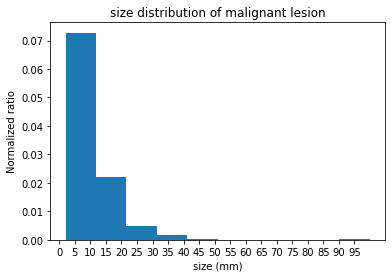

In [17]:
# Histogram for size of malignant lesion
make_hist(sizesm,title="size distribution of malignant lesion",x_lab='size (mm)',y_lab='Normalized ratio',density=True)

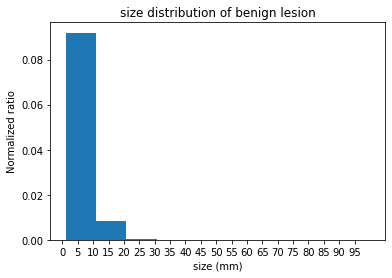

In [18]:
# Histogram for size of benign lesion
make_hist(sizesb,title="size distribution of benign lesion",x_lab='size (mm)',y_lab='Normalized ratio',density=True)

In [19]:
def ecdf(data):
    """Compute empirical cumulative distribution function
    for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

Next we look at ECDF to see the distribution of each malignant and benign lesions.

Text(0.5, 1.0, 'Malignant lesion ECDF')

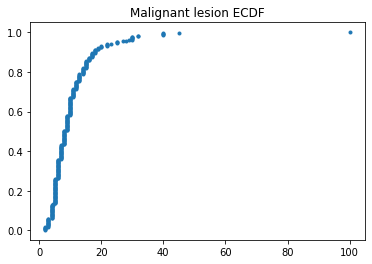

In [20]:
x_msize,y_msize=ecdf(sizesm) # get x and y for ecdf: x_msize, y_msize

# plot two ecdf on top of one another to see the difference
plt.plot(x_msize,y_msize, marker='.',linestyle='none')
plt.title("Malignant lesion ECDF")

Text(0.5, 1.0, 'Benign lesion ECDF')

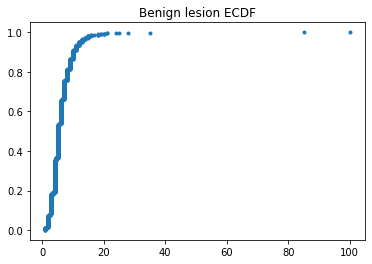

In [21]:
x_bsize,y_bsize=ecdf(sizesb) # get x and y for ecdf: x_bsize, y_bsize

# plot two ecdf on top of one another to see the difference
plt.plot(x_bsize,y_bsize, marker='.',linestyle='none')
plt.title("Benign lesion ECDF")

Text(0.5, 1.0, 'ECDF of Malignant vs. Benign')

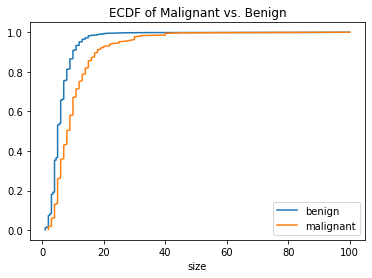

In [22]:
# compare the distribution of benign and malignant lesion
plt.plot(x_bsize,y_bsize,label='benign')
plt.plot(x_msize,y_msize,label='malignant')
plt.xlabel('size')
plt.legend()
plt.title("ECDF of Malignant vs. Benign")

As seen on the plot, the actual values have several lesions that are very big which makes the rest of the graph difficult to see.

In order to get a better idea of the difference between benign and malignant lesion, normalized samples were randomly selected to generate the ECDF plot.

In [23]:
# compare normalized ecdf to regular ecdf of malignant lesions
msize_samples=np.random.normal(np.mean(sizesm),np.std(sizesm),size=100)
x_msize_norm,y_msize_norm=ecdf(msize_samples) # get normalized ecdf

# compare normalized ecdf to regular ecdf of benign lesions
bsize_samples=np.random.normal(np.mean(sizesb),np.std(sizesb),size=100)
x_bsize_norm,y_bsize_norm=ecdf(bsize_samples) # get normalized ecdf


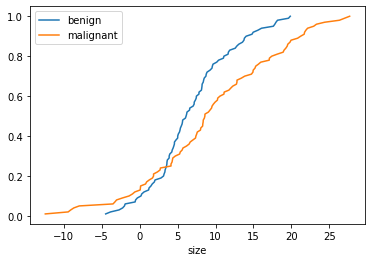

In [24]:
plt.plot(x_bsize_norm,y_bsize_norm,label='benign')
plt.plot(x_msize_norm,y_msize_norm,label='malignant')
plt.xlabel('size')
plt.legend()

Distribution of malignant lesion is clearly more towards the right than the benign which implies malignant lesions are likely to be bigger than benign. <br></br> A Student's T-test was performed to check if the difference is significant.

In [25]:
from scipy.stats import ttest_ind

def checkttest(a,b,alpha=0.01):
    """
    Performs Student's t test for a and b
    a, b: two datasets
    """
    pval=ttest_ind(a,b).pvalue # get p value: pval
    # the difference between the value a and b is significant
    # if the p-value is smaller than alpha(default: 0.01)
    if pval<=alpha:
        print(pval,"Mean is different enough to be significant")
    else:
        print(pval, "Mean is too similar to be significant")

In [26]:
checkttest(sizesb,sizesm)

2.7279515204510347e-29 Mean is different enough to be significant


Conclusion: bigger mole is more likely to be malignant

2. age of the patients

In [27]:
malig_age=np.sort(malignant['meta.clinical.age_approx'].dropna()) # age of patients with malignant lesion

In [28]:
benign_age=np.sort(benign['meta.clinical.age_approx'].dropna()) # age of patients with benign lesion

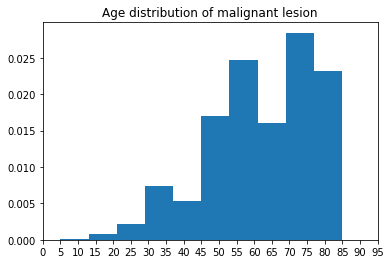

In [29]:
# Histogram of age of patients with malignant lesion
make_hist(malig_age,density=True,title="Age distribution of malignant lesion")

In [30]:
malig_mean=np.mean(malig_age)
malig_std=np.std(malig_age)
print("The average age of patient with malignant lesion is "+str(round(malig_mean,2))
      + " with the standard deviation "+str(round(malig_std,2)))

The average age of patient with malignant lesion is 62.0 with the standard deviation 15.78


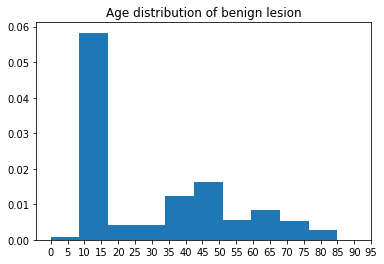

In [31]:
# Histogram of age of patients with benign lesion
make_hist(benign_age,density=True,title="Age distribution of benign lesion")

In [32]:
ben_mean=np.mean(benign_age)
ben_std=np.std(benign_age)
print("The average age of patient with benign lesion is "+str(round(ben_mean,2))
      + " with the standard deviation "+str(round(ben_std,2)))

The average age of patient with benign lesion is 31.52 with the standard deviation 20.65


The benign data had a sudden big spike on the teenagers. After looking over the data, the dataset 'SONIC' was shown to only contain benign lesion from young students. As this might cause the average patient age in benign lesion to drop significantly, this dataset was removed.

In [33]:
benign_no_sonic=benign[benign['dataset.name'] != 'SONIC']

In [34]:
ben_no_sonic_age=np.sort(benign_no_sonic['meta.clinical.age_approx'].dropna())
# age of patients(not included in the dataset "SONIC") with benign lesion

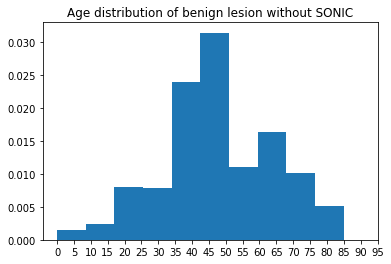

In [35]:
make_hist(ben_no_sonic_age,density=True,title="Age distribution of benign lesion without SONIC")

In [36]:
ben_no_sonic_mean=np.mean(ben_no_sonic_age)
ben_no_sonic_std=np.std(ben_no_sonic_age)
print("If we exclude the dataset from \"SONIC\", the average age of patient with benign lesion is "+str(round(ben_no_sonic_mean,2))
      + " with the standard deviation "+str(round(ben_no_sonic_std,2)))

If we exclude the dataset from "SONIC", the average age of patient with benign lesion is 47.85 with the standard deviation 16.58


We will also look at the ecdf of age data to better understand distribution

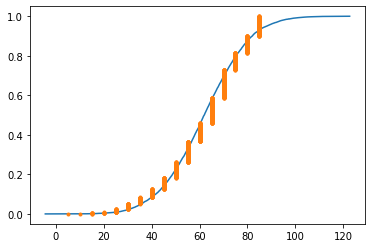

In [37]:
malig_samples=np.random.normal(malig_mean,malig_std,size=10000)

x_malig_norm,y_malig_norm=ecdf(malig_samples)
x_malig,y_malig=ecdf(malig_age)

plt.plot(x_malig_norm,y_malig_norm)
plt.plot(x_malig,y_malig, marker='.',linestyle='none')

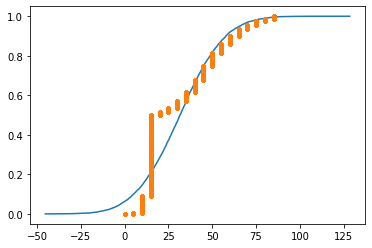

In [38]:
ben_samples=np.random.normal(ben_mean,ben_std,size=10000)

x_ben_norm,y_ben_norm=ecdf(ben_samples)
x_ben,y_ben=ecdf(benign_age)

plt.plot(x_ben_norm,y_ben_norm)
plt.plot(x_ben,y_ben, marker='.',linestyle='none')

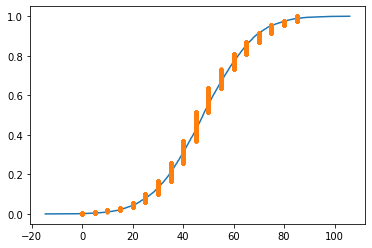

In [39]:
ben_samples=np.random.normal(ben_no_sonic_mean,ben_no_sonic_std,size=10000)

x_ben_norm,y_ben_norm=ecdf(ben_samples)
x_ben,y_ben=ecdf(ben_no_sonic_age)

plt.plot(x_ben_norm,y_ben_norm)
plt.plot(x_ben,y_ben, marker='.',linestyle='none')

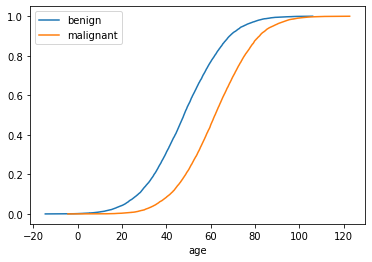

In [40]:
plt.plot(x_ben_norm,y_ben_norm, label='benign')
plt.plot(x_malig_norm,y_malig_norm, label='malignant')
plt.xlabel('age')
plt.legend()

ECDF graph implies that patients with benign lesions are younger than patients with malignant lesion.<br></br>
Student's T test was performed to confirm this statement.

In [41]:
checkttest(ben_no_sonic_age,malig_age)

9.37418008472944e-276 Mean is different enough to be significant


The result of the T-test confirms that the age is a significant factor in malignancy.

Conclusion: Lesion appearing on the older patient is more likely to be malignant

3. Race of each patients

In [42]:
len(df['meta.unstructured.race'])

23906

In [43]:
import pandas as pd
# Find the position of moles
race=df['meta.unstructured.race'].dropna()
race=pd.Series([x.lower() for x in list(race)])
race_data=race.value_counts()
race_dict=dict(race_data)
print(race_data)

white           8486
hispanic         771
unknown          547
asian            184
black             74
native ame         5
multi racial       3
dtype: int64


In [44]:
def make_bar(dictionary, title="",x_tick_rotation=70):
    """ 
    Show bar plot of the dictionary
    input: dict
    output: show plot
    """
    fig, ax = plt.subplots()
    labels=list(dictionary.keys())
    x = np.arange(len(dictionary))  # the label locations
    ax.bar(x, dictionary.values())
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.xaxis.set_tick_params(rotation=70)
    ax.set_title(title)
    return
    

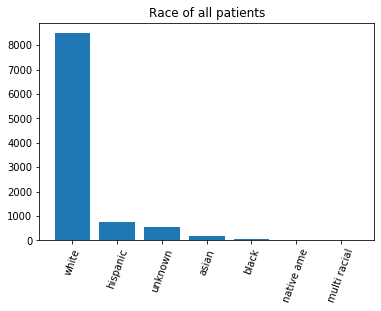

In [45]:
make_bar(race_dict,"Race of all patients")

To understand the distribution better, we will look at a pie chart

In [46]:
percentage_race_dict={k:round(100*race_dict[k]/sum(race_dict.values()),2) for k in race_dict}

In [47]:
percentage_race_dict

{'white': 84.27,
 'hispanic': 7.66,
 'unknown': 5.43,
 'asian': 1.83,
 'black': 0.73,
 'native ame': 0.05,
 'multi racial': 0.03}

In [48]:
percentage_race_dict['others']=percentage_race_dict['native ame']+percentage_race_dict['multi racial']
del percentage_race_dict['native ame']
del percentage_race_dict['multi racial']

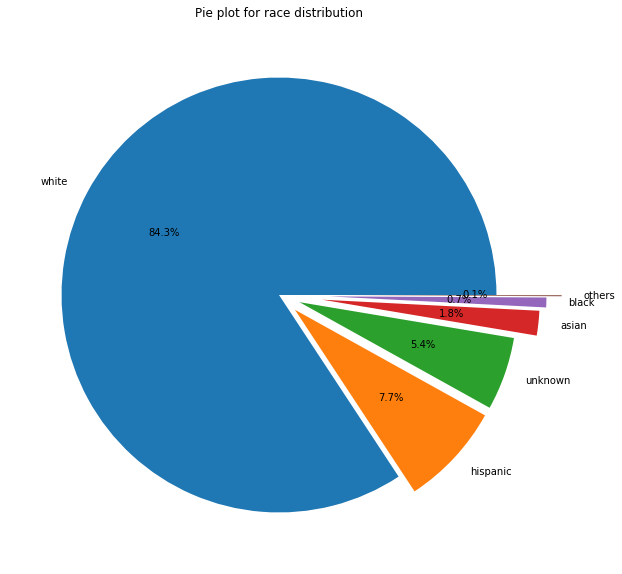

In [49]:
plt.pie(percentage_race_dict.values(),labels=percentage_race_dict.keys(),autopct='%1.1f%%',explode=[0,0.1,0.1,0.2,0.23,0.3])
plt.title("Pie plot for race distribution")
fig = plt.gcf()
fig.set_size_inches(10,10)

White individuals are far more likely to visit the hospital to get their lesions checked then any other race.<br></br>
This may be due to the simple fact that white americans make up about 70 percent of the population, or the fact that dark colored lesions are more visible on paler skin.

To find out whether the race of the patient is significant in determining malignancy of the lesion, the ratio of malignant lesion compared to the total number of patients were calculated

In [50]:
race_mal=malignant['meta.unstructured.race'].dropna()
race_mal=pd.Series([x.lower() for x in list(race_mal)])
race_mal_data=race_mal.value_counts()
race_mal_dict=dict(race_mal_data)
print(race_mal_data)

unknown    111
white      104
asian        1
dtype: int64


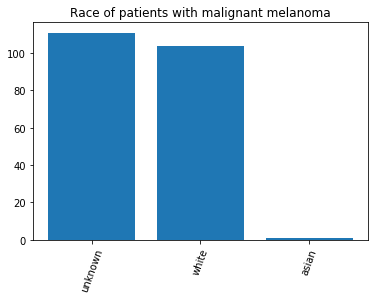

In [51]:
make_bar(race_mal_dict,"Race of patients with malignant melanoma")

In [52]:
# make a dictionary of percentage of lesion with malignancy
percentage_mal_dict={k: race_mal_dict[k] / race_dict[k] for k in race_dict if k in race_mal_dict}

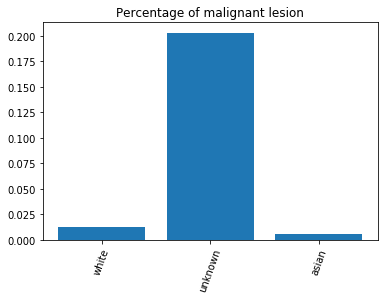

In [53]:
make_bar(percentage_mal_dict,"Percentage of malignant lesion")

It is difficult to say if the race of the patient affects malignancy, as there was no data from races other than Asian and White.

4. Position of the lesion

In [54]:
# Find the position of moles
positions=df['meta.clinical.anatom_site_general'].dropna()
pos_data=positions.value_counts()
pos_dict=dict(pos_data)
print(pos_data)

posterior torso    3209
lower extremity    3145
anterior torso     2127
upper extremity    1920
head/neck          1690
lateral torso        75
palms/soles          30
Name: meta.clinical.anatom_site_general, dtype: int64


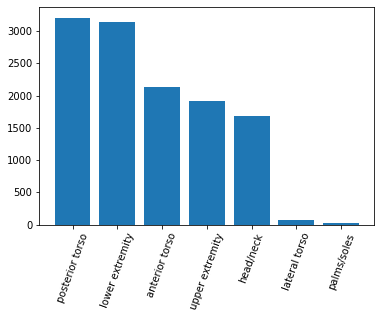

In [55]:
make_bar(pos_dict)

In [56]:
# Find the positions of malignant moles
positions_mal=malignant['meta.clinical.anatom_site_general'].dropna()
pos_mal_data=positions_mal.value_counts()
pos_mal_dict=dict(pos_mal_data)
print(pos_mal_dict)

{'posterior torso': 538, 'upper extremity': 455, 'lower extremity': 405, 'head/neck': 374, 'anterior torso': 260, 'lateral torso': 16, 'palms/soles': 8}


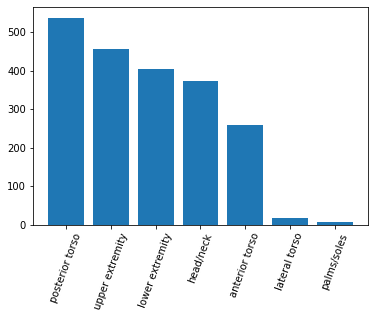

In [57]:
make_bar(pos_mal_dict)

In [58]:
# make a dictionary of percentage of lesion with malignancy
pos_mal_percentage={k: pos_mal_dict[k] / pos_dict[k] for k in pos_dict if k in pos_mal_dict}

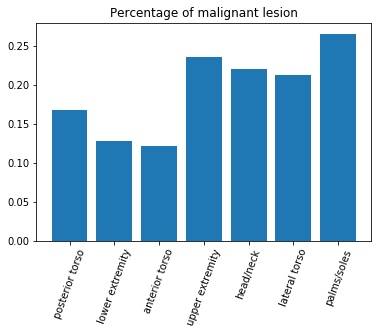

In [59]:
make_bar(pos_mal_percentage,"Percentage of malignant lesion")

The mole on the palms or soles are more likely to be malignant than others.<br></br> Posterior torso, lower extremity, and anterior torso all seem to be less likely to develop malignant lesion than other parts, although they are the three most likely positions where a patient get a lesion. <br></br>This may be due to malignant melanoma developing from exposure to UV light as upper part of the body and palms are more likely to be exposed than the lower body part.

Conclusion: lesions are more likely to be malignant if 1. the size is big, 2. the patient is old, 3. it appeared on palm or sole.